In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data/VisaFile.csv", encoding="latin1", low_memory=False)

df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)

df["case_received_date"] = pd.to_datetime(df["case_received_date"],format="mixed", errors="coerce")
df["decision_date"] = pd.to_datetime(df["decision_date"],format="mixed", errors="coerce")

df = df.dropna(subset=["case_received_date", "decision_date"])

df["processing_time_days"] = (
    df["decision_date"] - df["case_received_date"]
).dt.days

df = df[df["processing_time_days"] >= 0]

df.head()


,case_number,visa_status,employer_name,prevailing_wage_submitted,prevailing_wage_submitted_unit,paid_wage_submitted,paid_wage_submitted_unit,job_title,work_city,prevailing_wage_soc_code,prevailing_wage_soc_title,work_state,full_time_position_y_n,visa_class,job_title_subgroup,order,case_received_date,decision_date,processing_time_days
0,I-200-13014-224796,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24042,2013-01-22,2013-01-28,6
1,I-200-13036-300926,denied,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24066,2013-02-13,2013-02-19,6
2,I-200-13044-506275,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24071,2013-02-19,2013-02-25,6
3,I-200-13035-351096,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24072,2013-02-20,2013-02-26,6
4,I-200-13032-621173,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24073,2013-02-20,2013-02-26,6


In [4]:
df.shape


(129575, 19)

In [5]:
df["processing_time_days"].describe()


count    129575.000000
mean        113.374254
std         192.580760
min           0.000000
25%           6.000000
50%           9.000000
75%         181.000000
max        2649.000000
Name: processing_time_days, dtype: float64

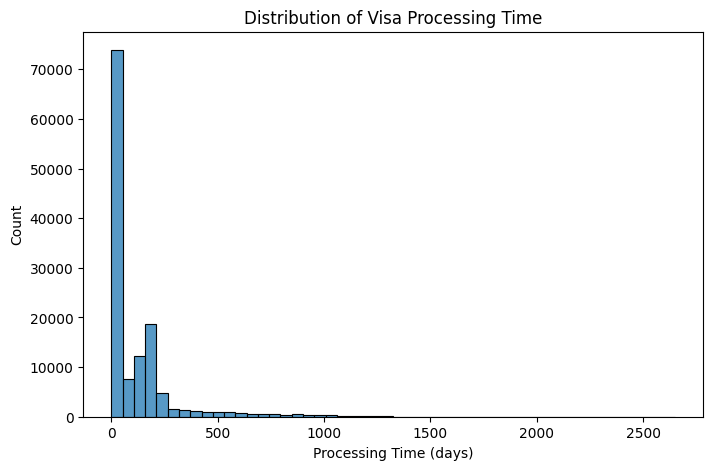

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["processing_time_days"], bins=50)
plt.xlabel("Processing Time (days)")
plt.title("Distribution of Visa Processing Time")
plt.show()


In [7]:
df = df[df["processing_time_days"] <= 365]
